# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model

def polynomial_dataframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = np.power(feature, power)
    return poly_dataframe

In [6]:
dtype_dict = {'bathrooms':float, 
              'waterfront':int, 
              'sqft_above':int, 
              'sqft_living15':float, 
              'grade':int, 
              'yr_renovated':int, 
              'price':float, 
              'bedrooms':float, 
              'zipcode':str, 
              'long':float, 
              'sqft_lot15':float, 
              'sqft_living':float, 
              'floors':str, 
              'condition':int, 
              'lat':float, 
              'date':str, 
              'sqft_basement':int, 
              'yr_built':int, 
              'id':str, 
              'sqft_lot':int, 
              'view':int}

Read in Sales Data

In [60]:
sales = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8092,1924059029,20140617T000000,4668000.0,5.0,6.75,9640.0,13068,1,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270.0,10454.0
9254,9208900037,20140919T000000,6885000.0,6.0,7.75,9890.0,31374,2,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540.0,42730.0
3914,9808700762,20140611T000000,7062500.0,5.0,4.50,10040.0,37325,2,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930.0,25449.0
7252,6762700020,20141013T000000,7700000.0,6.0,8.00,12050.0,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940.0,8800.0


Make a 1 degree polynomial dframe with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

In [14]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
poly1_data[:2]

,power_1,price
19452,290.0,142000.0
15381,370.0,276000.0


In [3]:
# Create linear regression object
regr_model = linear_model.LinearRegression()

In [34]:
# Set Features/Target
features = ['power_1']
target = ['price']

# Set up Data
X_train = poly1_data[features]
y_train = poly1_data[target]

# Fit Linear Regression
model1 = regr_model.fit(X_train, y_train)

In [35]:
print('model 1:','Coefficients: \n', model1.coef_)
print('model 1:','intercept: \n', model1.intercept_)

model 1: Coefficients: 
 [[280.6235679]]
model 1: intercept: 
 [-43580.74309447]


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


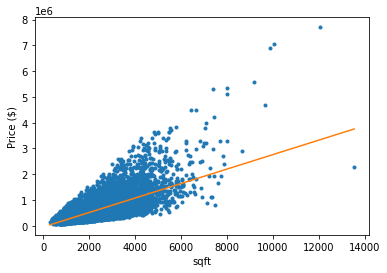

In [37]:
fig = plt.figure()
plt.xlabel('sqft')
plt.ylabel('Price ($)')
plt.plot(poly1_data['power_1'], poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data['power_1'].values.reshape((-1,1))),'-')

Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [40]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = poly2_data.columns.values.tolist() 
poly2_data['price'] = sales['price'] # add price to the data since it's the target
poly2_data[:2]

,power_1,power_2,price
19452,290.0,84100.0,142000.0
15381,370.0,136900.0,276000.0


In [41]:
# Fit Linear Regression
model2 = regr_model.fit(poly2_data[my_features].values.reshape((-1,2)), poly2_data['price'])

In [48]:
print('model 2:','Coefficients: \n', model2.coef_)
print('model 2:','intercept: \n', model2.intercept_)

model 2: Coefficients: 
 [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]
model 2: intercept: 
 336819.7482198205


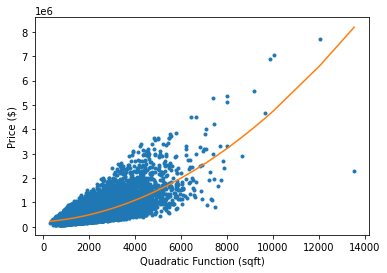

In [43]:
fig = plt.figure()
plt.xlabel('Quadratic Function (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly2_data['power_1'], poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data[my_features].values.reshape((-1,2))),'-')

In [44]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features = poly3_data.columns.values.tolist() 
poly3_data['price'] = sales['price'] # add price to the data since it's the target
poly3_data[:2]

,power_1,power_2,power_3,price
19452,290.0,84100.0,24389000.0,142000.0
15381,370.0,136900.0,50653000.0,276000.0


In [46]:
# Fit Linear Regression
model3 = regr_model.fit(poly3_data[my_features].values.reshape((-1,3)), poly3_data['price'])

In [47]:
print('model 3:','Coefficients: \n', model3.coef_)
print('model 3:','intercept: \n', model3.intercept_)

model 3: Coefficients: 
 [-9.01819864e+01  8.70465089e-02 -3.84055260e-06]
model 3: intercept: 
 336819.7482198205


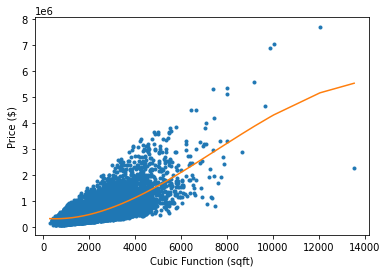

In [52]:
fig = plt.figure()
plt.xlabel('Cubic Function (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly3_data['power_1'], poly3_data['price'],'.',
         poly3_data['power_1'], model3.predict(poly3_data[my_features].values.reshape((-1,3))),'-')

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [53]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features = poly15_data.columns.values.tolist() 
poly15_data['price'] = sales['price'] # add price to the data since it's the target
poly15_data[:2]

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
19452,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
15381,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0


In [54]:
# Fit Linear Regression
model4 = regr_model.fit(poly15_data[my_features].values.reshape((-1,15)), poly15_data['price'])

In [55]:
print('model 4:','Coefficients: \n', model4.coef_)
print('model 4:','intercept: \n', model4.intercept_)

model 4: Coefficients: 
 [ 4.56404164e-91 -6.23779017e-50  2.87780943e-56  2.78197725e-88
  1.19863929e-74  2.68553413e-71  2.26147568e-67  1.85900299e-63
  1.47144115e-59  1.09771012e-55  7.43509038e-52  4.23015577e-48
  1.61618577e-44 -2.49283826e-48  9.59718336e-53]
model 4: intercept: 
 537116.3296378785


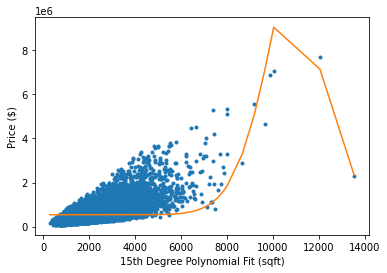

In [56]:
fig = plt.figure()
plt.xlabel('15th Degree Polynomial Fit (sqft)')
plt.ylabel('Price ($)')
plt.plot(poly15_data['power_1'], poly15_data['price'],'.',
         poly15_data['power_1'], model4.predict(poly15_data[my_features].values.reshape((-1,15))),'-')

Estimate a 15th degree polynomial on all 4 datasets, plot the results and view the coefficients for all four models.<br>
**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

In [25]:
#Read Data In
sales1 = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_set_1_data.csv')
sales2 = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_set_2_data.csv')
sales3 = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_set_3_data.csv')
sales4 = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_set_4_data.csv')

In [29]:
#Prepare inputs
sales1_15d = polynomial_dataframe(sales1['sqft_living'], 15)
sales2_15d = polynomial_dataframe(sales2['sqft_living'], 15)
#sales3_15d = polynomial_dataframe(sales3['sqft_living'], 15)
#sales4_15d = polynomial_dataframe(sales4['sqft_living'], 15)

my_features = sales1_15d.columns.values.tolist()

sales1_15d['price'] = sales1['price']
sales2_15d['price'] = sales2['price']
#sales3_15d['price'] = sales3['price']
#sales4_15d['price'] = sales4['price']
my_features

['power_1',
 'power_2',
 'power_3',
 'power_4',
 'power_5',
 'power_6',
 'power_7',
 'power_8',
 'power_9',
 'power_10',
 'power_11',
 'power_12',
 'power_13',
 'power_14',
 'power_15']

In [38]:
# Fit Models
model_sales1 = regr_model.fit(sales1_15d[my_features].values.reshape((-1,15)), sales1_15d['price'])

In [39]:
print('model_sales1:','Coefficients: \n', model_sales1.coef_)
print('model_sales1:','intercept: \n', model_sales1.intercept_)

model_sales1: Coefficients: 
 [ 1.76313235e-05  4.45214235e-02  4.14044009e-06 -4.48125568e-10
 -2.26138552e-14  9.71445147e-17 -7.16440796e-16  2.93168267e-16
 -1.71737624e-16 -1.27155231e-15  1.25333771e-16  5.46654735e-16
  1.95156391e-16 -3.12250226e-16 -3.74700271e-16]
model_sales1: intercept: 
 274663.1537476826


In [57]:
model_sales2 = regr_model.fit(sales2_15d[my_features].values.reshape((-1,15)), sales2_15d['price'])

In [58]:
print('model_sales2:','Coefficients: \n', model_sales2.coef_)
print('model_sales2:','intercept: \n', model_sales2.intercept_)

model_sales2: Coefficients: 
 [ 3.01064795e-05  6.13841889e-02 -2.50816919e-06  1.10987768e-10
 -1.77149961e-14  7.97972799e-16 -3.53016227e-16 -2.97938757e-16
 -6.05418493e-16  3.78169718e-16  7.14706072e-16  7.61543606e-16
  1.03736464e-15 -4.66640615e-16  1.33920652e-15]
model_sales2: intercept: 
 255741.7543627802


In [42]:
model_sales3 = regr_model.fit(sales3_15d[my_features].values.reshape((-1,15)), sales3_15d['price'])

In [43]:
print('model_sales3:','Coefficients: \n', model_sales3.coef_)
print('model_sales3:','intercept: \n', model_sales3.intercept_)

model_sales3: Coefficients: 
 [ 3.06186775e-05  6.77694137e-02 -5.36064129e-06  4.61981724e-10
 -1.31734901e-14 -1.52655666e-16 -3.53016227e-16  5.70724024e-16
  4.42354486e-16  5.27355937e-16 -2.34621350e-16  1.13277443e-15
  6.24500451e-16  3.27862737e-16 -2.49800181e-16]
model_sales3: intercept: 
 251790.810599196


In [44]:
model_sales4 = regr_model.fit(sales4_15d[my_features].values.reshape((-1,15)), sales4_15d['price'])

In [46]:
print('model_sales4:','Coefficients: \n', model_sales4.coef_)
print('model_sales4:','intercept: \n', model_sales4.intercept_)

model_sales4: Coefficients: 
 [ 2.92217595e-05  5.47111154e-02 -1.41236113e-06  7.10526183e-11
  3.46146722e-14 -1.23512311e-15 -4.09394740e-16  8.96852037e-16
 -4.89192020e-16 -5.32560107e-16  2.68882139e-16  3.93782229e-16
  2.87964097e-16 -1.03736464e-15 -3.26128013e-16]
model_sales4: intercept: 
 269770.7312103356


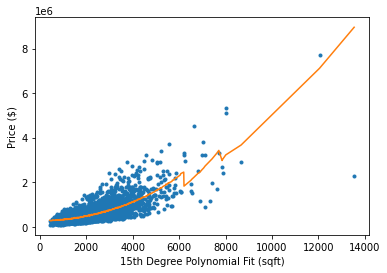

In [54]:
fig = plt.figure()
plt.xlabel('15th Degree Polynomial Fit (sqft)')
plt.ylabel('Price ($)')
plt.plot(sales1_15d['power_1'], sales1_15d['price'],'.',
         sales1_15d['power_1'], model_sales1.predict(sales1_15d[my_features].values.reshape((-1,15))),'-')

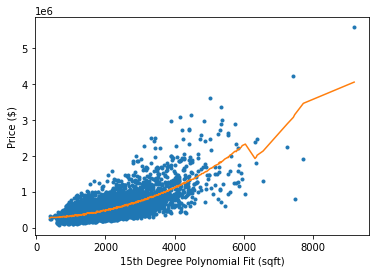

In [53]:
plt.xlabel('15th Degree Polynomial Fit (sqft)')
plt.ylabel('Price ($)')
plt.plot(sales2_15d['power_1'], sales2_15d['price'],'.',
         sales2_15d['power_1'], model_sales2.predict(sales2_15d[my_features].values.reshape((-1,15))),'-')

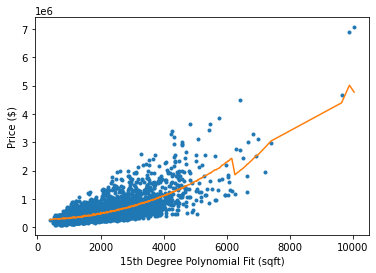

In [55]:
plt.xlabel('15th Degree Polynomial Fit (sqft)')
plt.ylabel('Price ($)')
plt.plot(sales3_15d['power_1'], sales3_15d['price'],'.',
         sales3_15d['power_1'], model_sales3.predict(sales3_15d[my_features].values.reshape((-1,15))),'-')

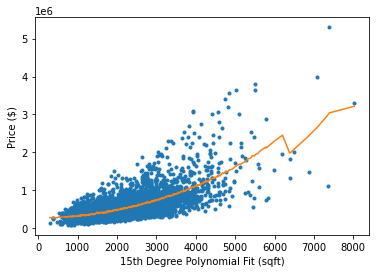

In [56]:
plt.xlabel('15th Degree Polynomial Fit (sqft)')
plt.ylabel('Price ($)')
plt.plot(sales4_15d['power_1'], sales4_15d['price'],'.',
         sales4_15d['power_1'], model_sales4.predict(sales4_15d[my_features].values.reshape((-1,15))),'-')

In [64]:
test_sales = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_test_data.csv')
train_sales = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_train_data.csv')
valid_sales = pd.read_csv('~/Courses/u-wash-machine-learning/regression/data/wk3_kc_house_valid_data.csv')

print ('sales data: ' + str(len(sales)))
print ('testing data: ' + str(len(test_sales)))
print ('training data: '+ str(len(train_sales)))
print ('validation data: ' + str(len(valid_sales)))

sales data: 21613
testing data: 2217
training data: 9761
validation data: 9635


In [62]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    y_pred = model.predict(data)

    # Then compute the residuals/errors
    residuals = outcome - y_pred

    # Then square and add them up
    RSS = (residuals * residuals).sum()

    return(RSS)

In [70]:
rssDic = {}
rssDictest = {}
modelDic = {}
for i in range(1,15+1):
    poly_train_data  = polynomial_dataframe(train_sales['sqft_living'], i)
    poly_features = poly_train_data.columns.values.tolist()
    modelDic[i] = regr_model.fit(poly_train_data[poly_features].values.reshape((-1,i)), train_sales['price'])
    
    poly_valid_data = polynomial_dataframe(valid_sales['sqft_living'], i)
    
    poly_test_data = polynomial_dataframe(test_sales['sqft_living'], i)
    predictions = modelDic[i].predict(poly_valid_data[poly_features])
    
    rssDic[i] = get_residual_sum_of_squares(modelDic[i], poly_valid_data, valid_sales['price'])
    rssDictest[i] = get_residual_sum_of_squares(modelDic[i], poly_test_data, test_sales['price'])

print('rss of each model on validation data:',rssDic)
print('rss of each model on test data:',rssDictest)

/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444

rss of each model on validation data: {1: 629097886299585.8, 2: 623955062706518.1, 3: 625820280251670.5, 4: 629987335742088.1, 5: 623372998856313.0, 6: 623243653937253.0, 7: 623177588035078.9, 8: 623373703580694.8, 9: 623370162934554.0, 10: 623405652309051.0, 11: 623530842324400.2, 12: 623376976236003.5, 13: 623322214811581.2, 14: 623256045543393.8, 15: 623381035422167.2}
rss of each model on test data: {1: 142347931358638.7, 2: 135542039274080.42, 3: 135585996079046.9, 4: 135382681360753.81, 5: 136772404244466.16, 6: 136765707091172.69, 7: 136759484743128.66, 8: 136783743512339.61, 9: 136771108983781.83, 10: 136765662746179.66, 11: 136768471804029.56, 12: 136738328651450.03, 13: 136813543127721.16, 14: 136980703314060.66, 15: 137014300227881.56}


/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/wbailey7/venv/lib/python3.7/site-packages/sklearn/base.py:444

# Polynomial_sframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [ ]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = turicreate.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature

    return poly_sframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [ ]:
print polynomial_sframe(tmp, 3)

# Visualizing polynomial regression

Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

In [ ]:
sales = turicreate.SFrame('home_data.sframe/')

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [ ]:
sales = sales.sort(['sqft_living', 'price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [ ]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [ ]:
model1 = turicreate.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

In [ ]:
#let's take a look at the weights before we plot
model1.coefficients

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [ ]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = turicreate.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

In [ ]:
model2.coefficients

In [ ]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
         poly2_data['power_1'], model2.predict(poly2_data),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

Now try a 15th degree polynomial:

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

# Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for turicreate.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**